# Semana 2 Parte 1

In [ ]:
#Lectura de datos desde un archivo CSV
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)
file_name = "Terminos_lagoon_TA_DIC_2023_RawData.csv"
df = import_csv(file_name)
print ("Primeras columnas del DataFrame:")
print (df.head())

In [4]:
Datos_df = import_csv ("Terminos_lagoon_TA_DIC_2023_RawData.csv")

## Tarea 4

In [19]:
import numpy as np
import pandas as pd

In [10]:
#Crear una columna nueva
Datos_df["TA_DIC_ratio"] = Datos_df["ta_micromol_kg"] / Datos_df["dic_micromol_kg"]
Datos_df["TA_DIC_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1236\4263285527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Datos_df["TA_DIC_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [15]:
#Media y desviación estándar de la nueva columna por estación 
by_season = (
    Datos_df.groupby("season", dropna=False)["TA_DIC_ratio"]
      .agg(mean="mean", std="std", count="count")
        .reset_index())
        

In [16]:
#Media y desviación estándar de la nueva columna por estación y área
by_season_area = (
    Datos_df.groupby(["season", "area"], dropna=False)["TA_DIC_ratio"]
      .agg(mean="mean", std="std", count="count")
        .reset_index())

In [24]:
#Salida de resultados
output_file = "TTA_DIC_Season_Areas.xlsx"

with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
    by_season.to_excel(writer, sheet_name="By_Season", index=False)
    by_season_area.to_excel(writer, sheet_name="By_Season_Area", index=False)

print("File saved as:", output_file)

File saved as: TTA_DIC_Season_Areas.xlsx


## Tarea 6

In [25]:
# Histograma
import pandas as pd
import matplotlib.pyplot as plt


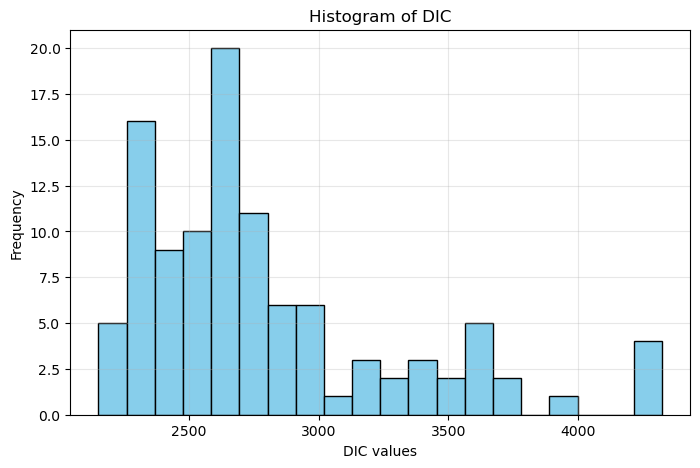

In [26]:
#Histograma DIC
plt.figure(figsize=(8, 5))
plt.hist(Datos_df["dic_micromol_kg"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Histogram of DIC")
plt.xlabel("DIC values")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

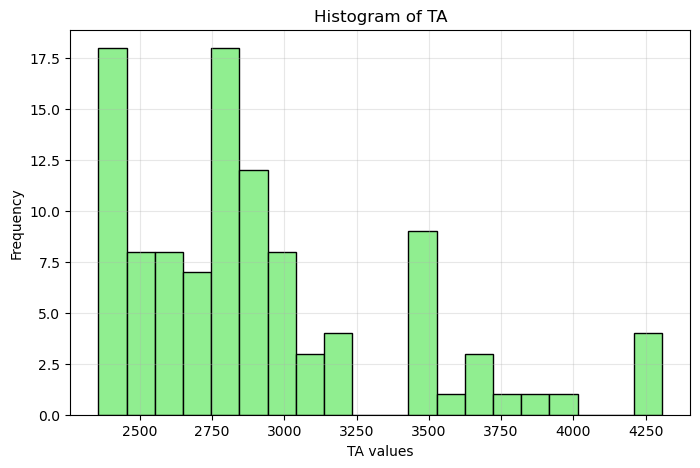

In [27]:
#Histograma TA
plt.figure(figsize=(8, 5))
plt.hist(Datos_df["ta_micromol_kg"].dropna(), bins=20, color="lightgreen", edgecolor="black")
plt.title("Histogram of TA")
plt.xlabel("TA values")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()